# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Base URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key\
+ "&q="

# Creating a dataframe to hold results from API call
weather_df = pd.DataFrame(columns = ["City",
                                    "Country",
                                    "id",
                                    "lat",
                                    "lon",
                                    "Max Temp (F)",
                                    "Humidity (%)",
                                    "Cloudiness (%)",
                                    "Wind Speed (mph)",
                                    "dt"])


# Loop through cities to make API call and input resulting data into df
# Print a log of each city as it is being processed
for city in cities:
    try:
        response = requests.get(url + city).json()
        print(f"Processing Record {cities.index(city)}: {city}")
        weather_df = weather_df.append({"City":response["name"],
                                    "Country":response["sys"]["country"],
                                    "id":response["id"],
                                    "lat":response["coord"]["lat"],
                                    "lon":response["coord"]["lon"],
                                    "Max Temp (F)":response["main"]["temp_max"],
                                    "Humidity (%)":response["main"]["humidity"],
                                    "Cloudiness (%)":response["clouds"]["all"],
                                    "Wind Speed (mph)":response["wind"]["speed"],
                                    "dt":response["dt"]
                                       }, ignore_index = True)
    except:
        print(f"{city} was not found :(")
        pass

print("API call processing completed")





Processing Record 0: ushuaia
Processing Record 1: ocos
Processing Record 2: leningradskiy
Processing Record 3: arraial do cabo
Processing Record 4: ancud
Processing Record 5: okha
Processing Record 6: avarua
Processing Record 7: eyl
Processing Record 8: iqaluit
Processing Record 9: araouane
Processing Record 10: mackay
Processing Record 11: cape town
Processing Record 12: ponta do sol
Processing Record 13: hilo
Processing Record 14: barrow
Processing Record 15: bathsheba
Processing Record 16: punta arenas
Processing Record 17: lingao
Processing Record 18: rikitea
Processing Record 19: palma
Processing Record 20: vaini
Processing Record 21: esso
Processing Record 22: nara
Processing Record 23: vanavara
Processing Record 24: bambous virieux
Processing Record 25: kamaishi
Processing Record 26: bethel
Processing Record 27: jamestown
Processing Record 28: kaitangata
Processing Record 29: avera
Processing Record 30: new norfolk
Processing Record 31: saskylakh
Processing Record 32: hobart
Pro

Processing Record 236: kasempa
Processing Record 237: itarema
Processing Record 238: husavik
Processing Record 239: zhuhai
Processing Record 240: hosur
Processing Record 241: murray bridge
Processing Record 242: fethiye
Processing Record 243: srivardhan
Processing Record 244: borovskoy
Processing Record 245: meadow lake
Processing Record 246: elk grove
Processing Record 247: mys shmidta
mys shmidta was not found :(
Processing Record 248: morden
Processing Record 249: komsomolskiy
Processing Record 250: muzhi
Processing Record 251: geraldton
Processing Record 252: skibbereen
Processing Record 253: kavos
Processing Record 254: morehead
Processing Record 255: yaring
Processing Record 256: pundaguitan
Processing Record 257: general roca
Processing Record 258: lorengau
Processing Record 259: jalu
Processing Record 260: kothapet
Processing Record 261: hithadhoo
Processing Record 262: tall kayf
Processing Record 263: bilibino
Processing Record 264: seoul
Processing Record 265: san quintin
Pro

Processing Record 476: vao
Processing Record 477: tambilil
Processing Record 478: kang
Processing Record 479: copiapo
Processing Record 480: sobolevo
Processing Record 481: pevek
Processing Record 482: pryazha
Processing Record 483: coihaique
Processing Record 484: matay
Processing Record 485: marshall
Processing Record 486: inhambane
Processing Record 487: sao filipe
Processing Record 488: batouri
Processing Record 489: dhidhdhoo
Processing Record 490: rosa zarate
Processing Record 491: niksic
Processing Record 492: coquimbo
Processing Record 493: tangzhai
Processing Record 494: chumikan
Processing Record 495: kjollefjord
Processing Record 496: kunming
Processing Record 497: tres lagoas
Processing Record 498: kakonko
Processing Record 499: mastic beach
Processing Record 500: sola
Processing Record 501: poli
Processing Record 502: neuquen
Processing Record 503: ternate
Processing Record 504: sioux lookout
Processing Record 505: alofi
Processing Record 506: yulara
Processing Record 507:

In [15]:
weather_df['dt'] = pd.to_datetime(weather_df['dt'], unit='s', utc=True).dt.strftime('%m/%d/%Y')
weather_df

,City,Country,id,lat,lon,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),dt
0,Ushuaia,AR,3833367,-54.8000,-68.3000,37.06,75,0,3.44,08/22/2022
1,Ocós,GT,3592086,14.5094,-92.1933,75.38,74,64,4.47,08/22/2022
2,Leningradskiy,RU,2123814,69.3833,178.4167,38.08,83,0,13.02,08/22/2022
3,Arraial do Cabo,BR,3471451,-22.9661,-42.0278,71.46,64,40,4.61,08/22/2022
4,Ancud,CL,3899695,-41.8697,-73.8203,46.51,90,100,3.80,08/22/2022
...,...,...,...,...,...,...,...,...,...,...
561,Uthai Thani,TH,1149965,15.3833,99.5500,78.37,78,100,4.63,08/22/2022
562,Visnes,NO,3131500,59.3556,5.2242,62.98,59,20,9.22,08/22/2022
563,Plettenberg Bay,ZA,964712,-34.0527,23.3716,59.41,71,85,6.29,08/22/2022
564,Atar,MR,2381334,20.5169,-13.0499,99.39,26,89,1.25,08/22/2022


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Export the city data into a csv
weather_df.to_csv("../output_data/output_weather_data.csv", index_label="City_ID")


In [17]:
weather_df

,City,Country,id,lat,lon,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),dt
0,Ushuaia,AR,3833367,-54.8000,-68.3000,37.06,75,0,3.44,08/22/2022
1,Ocós,GT,3592086,14.5094,-92.1933,75.38,74,64,4.47,08/22/2022
2,Leningradskiy,RU,2123814,69.3833,178.4167,38.08,83,0,13.02,08/22/2022
3,Arraial do Cabo,BR,3471451,-22.9661,-42.0278,71.46,64,40,4.61,08/22/2022
4,Ancud,CL,3899695,-41.8697,-73.8203,46.51,90,100,3.80,08/22/2022
...,...,...,...,...,...,...,...,...,...,...
561,Uthai Thani,TH,1149965,15.3833,99.5500,78.37,78,100,4.63,08/22/2022
562,Visnes,NO,3131500,59.3556,5.2242,62.98,59,20,9.22,08/22/2022
563,Plettenberg Bay,ZA,964712,-34.0527,23.3716,59.41,71,85,6.29,08/22/2022
564,Atar,MR,2381334,20.5169,-13.0499,99.39,26,89,1.25,08/22/2022


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
len(weather_df.loc[weather_df['Humidity (%)']>100])

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [19]:
date = weather_df['dt'][0]
date

'08/22/2022'

## Latitude vs. Temperature Plot

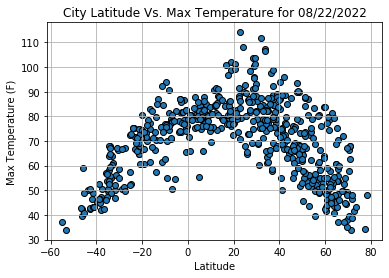

In [33]:
plt.scatter(weather_df['lat'],weather_df['Max Temp (F)'],
           edgecolor="black", marker="o")

plt.title(f"City Latitude Vs. Max Temperature for {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("../output_data/output_plots/lat_temp_scatter.png", index= False)

plt.show()

This plot shows the maximum temperatures for cities as they extend north and south of the equator. It suggests that the cities with the hottest maximum temperatures are centered around the equator, with colder maximum temperatures near the poles.

## Latitude vs. Humidity Plot

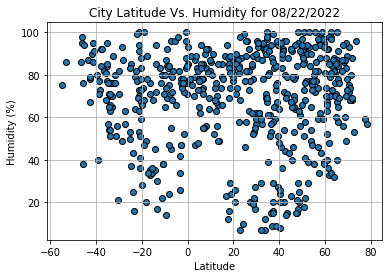

In [34]:
plt.scatter(weather_df['lat'],weather_df['Humidity (%)'],
           edgecolor="black", marker="o")

plt.title(f"City Latitude Vs. Humidity for {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("../output_data/output_plots/lat_humidity_scatter.png", index= False)

plt.show()

This plot shows the  humidity for cities as they extend north and south of the equator. There are no strong trends shown in this data, but it shows that a majority of cities have humidities between 60-100% globally.

## Latitude vs. Cloudiness Plot

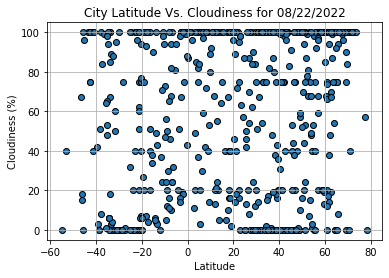

In [35]:
plt.scatter(weather_df['lat'],weather_df['Cloudiness (%)'],
           edgecolor="black", marker="o")

plt.title(f"City Latitude Vs. Cloudiness for {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("../output_data/output_plots/lat_cloudiness_scatter.png", index= False)

plt.show()

This plot shows the percentage of cloud cover for cities as they extend north and south of the equator. There are no strong trends seen in this data, with diffuse distribution of points throughout the plot. The majority of points seem to be at 100% or 0%, indicating that the data may likely be described as 'no cloud cover' or 'full cloud cover.'

## Latitude vs. Wind Speed Plot

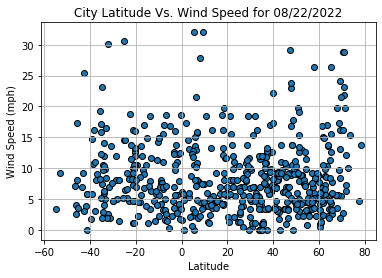

In [36]:
plt.scatter(weather_df['lat'],weather_df['Wind Speed (mph)'],
           edgecolor="black", marker="o")

plt.title(f"City Latitude Vs. Wind Speed for {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("../output_data/output_plots/lat_windspeed_scatter.png", index= False)

plt.show()

This plot shows the wind speed for cities as they extend north and south of the equator. The data suggests that most cities globally experience wind speeds between 0 mph and 15 mph with very few cities showing wind speeds greater than 20 mph.

## Linear Regression

In [86]:
# Separate data into northern and southern hemisphere data
northern = weather_df.loc[(weather_df["lat"] >= 0)]
southern = weather_df.loc[(weather_df["lat"] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

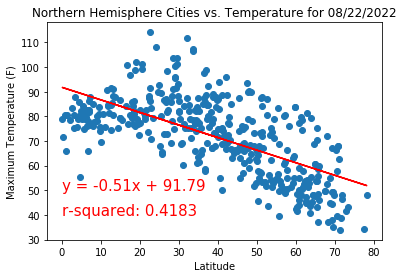

In [87]:
# Create the plot
x_values = northern['lat']
y_values = northern['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title(f'Northern Hemisphere Cities vs. Temperature for {date}')

plt.savefig("../output_data/output_plots/northern_temp_regression.png", index= False)

plt.show()



This plot shows that there is a mildly strong, negative correlation that shows that the maximum temperature of northern hemisphere cities decreases the further north the city is located.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

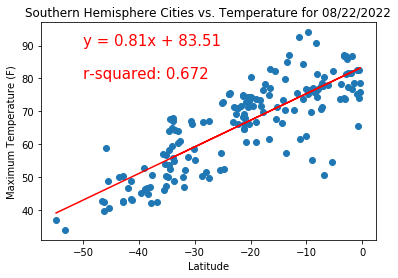

In [88]:
x_values = southern['lat']
y_values = southern['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title(f'Southern Hemisphere Cities vs. Temperature for {date}')

plt.savefig("../output_data/output_plots/southern_temp_regression.png", index= False)

plt.show()

This plot shows that there is a mildly strong, positive correlation that shows that the maximum temperature of southern hemisphere cities increases the closer the city is located to the equator. When comparing this plot to the plot above, it can be deduced that the maximum tempature of cities decreases the further from the equator the city is located.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

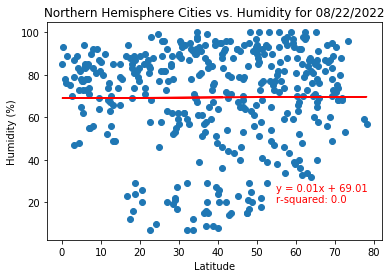

In [89]:
# Create the plot
x_values = northern['lat']
y_values = northern['Humidity (%)'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,25),fontsize=10,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(55,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Cities vs. Humidity for {date}')

plt.savefig("../output_data/output_plots/northern_humidity_regression.png", index= False)

plt.show()

This graph shows that there is almost no correlation between the location of northern hemisphere cities and the humidity of those cities.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

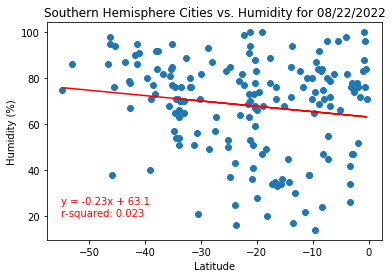

In [90]:
# Create the plot
x_values = southern['lat']
y_values = southern['Humidity (%)'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=10,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(-55,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Cities vs. Humidity for {date}')

plt.savefig("../output_data/output_plots/southern_humidity_regression.png", index= False)

plt.show()

This graph shows a very weak, negative correlation between southern hemisphere cities and the humidity in those cities. It suggests a very weak relationship that states that humidity decreases as the city approaches the equator. However, looking at the scatter plot shows us that the data is too varied throughout for this to be an accurate prediction.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

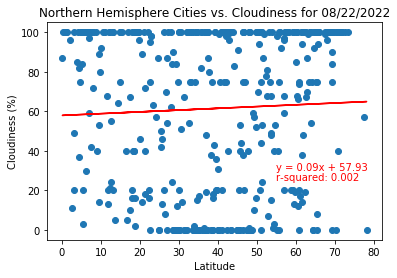

In [91]:
# Create the plot
x_values = northern['lat']
y_values = northern['Cloudiness (%)'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,30),fontsize=10,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(55,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere Cities vs. Cloudiness for {date}')

plt.savefig("../output_data/output_plots/northern_cloudiness_regression.png", index= False)

plt.show()

This data shows a very weak, positive correlation between cloudiness and the location of northen hemisphere cities. It suggests that cloud cover increases the further north the city is located. However, looking at the scatter plot shows us that the data is too varied throughout for this to be an accurate prediction.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

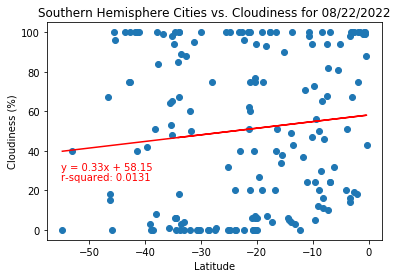

In [92]:
# Create the plot
x_values = southern['lat']
y_values = southern['Cloudiness (%)'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=10,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(-55,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere Cities vs. Cloudiness for {date}')

plt.savefig("../output_data/output_plots/southern_cloudiness_regression.png", index= False)

plt.show()

This data shows a very weak, positive correlation between cloudiness and the location of southern hemisphere cities. It suggests that cloud cover increases the closer the city is located to the equator, which is starkly different from the northern hemisphere data. However, looking at the scatter plot shows us that the data is too varied throughout for this to be an accurate prediction.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

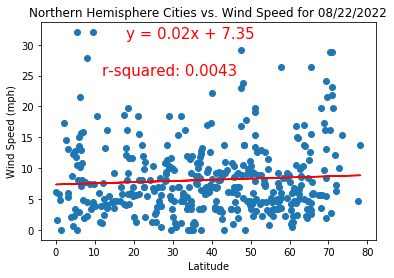

In [93]:
# Create the plot
x_values = northern['lat']
y_values = northern['Wind Speed (mph)'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,31),fontsize=15,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(12,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Cities vs. Wind Speed for {date}')

plt.savefig("../output_data/output_plots/northern_windspeed_regression.png", index= False)

plt.show()

This data shows a very weak, positive correlation between wind speed and the location of northen hemisphere cities. It suggests that wind speed increases the further north the city is located. However, looking at the scatter plot shows us that the correlation appears to be very weak, with most of the data ranging between 0 and 15 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

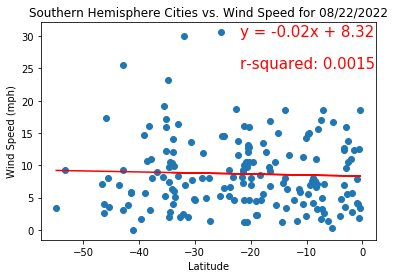

In [94]:
# Create the plot
x_values = southern['lat']
y_values = southern['Wind Speed (mph)'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,30),fontsize=15,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(-22,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Cities vs. Wind Speed for {date}')

plt.savefig("../output_data/output_plots/southern_windspeed_regression.png", index= False)

plt.show()

This data shows a very weak, negative correlation between wind speed and the location of southern hemisphere cities. It suggests that wind speed decreases the closer the city is to the equator. However, looking at the scatter plot shows us that the correlation appears to be very weak, with most of the data ranging between 0 and 15 mph and scattered throughout the southern hemisphere.